## Creating the K Nearest Neighbor Model 
## Isabel Delgado and Aniyah McWilliams 

In [63]:
# ! pip install plotly.express

In [64]:
! pip install nbformat

In [65]:
# importing all the necessary items 
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [66]:
# now reading in the data 
data = pd.read_csv('CDC-2019-2021-2023-DATA.csv')
data.head()

/var/folders/gr/s43l36xd55s6nsrb_jk9hkdw0000gn/T/ipykernel_42554/981771718.py:2: DtypeWarning:

Columns (1,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,BIRTHSEX,MENTHLTH,POORHLTH,ADDEPEV3,DECIDE,DIFFALON,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,IYEAR
0,0,NaN,0.0,0.0,0.0,No,No,No,No,No,No,Yes,Never,More than once,Never,Never,Never,Never,2019
1,1,NaN,0.0,10.0,0.0,No,No,No,Yes,No,No,No,Never,Once,More than once,Never,Never,Never,2019
2,2,NaN,30.0,0.0,0.0,No,No,No,No,No,No,No,NaN,Never,Never,Never,Never,Never,2019
3,3,NaN,0.0,0.0,0.0,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
4,4,NaN,0.0,NaN,0.0,No,No,No,No,No,No,No,Never,Never,Never,Never,Never,Never,2019


In [67]:
data = data.drop(['Unnamed: 0'], axis=1) # need to drop this 

In [68]:
# dropping all the nan data
data = data.dropna()
print(data.shape)

(15790, 18)


In [69]:
# selecting what the x and the y

In [70]:
data.IYEAR.value_counts()

IYEAR
2023    9322
2021    3652
2019    2816
Name: count, dtype: int64

In [71]:
data.ADDEPEV3.value_counts()

ADDEPEV3
0.0    11213
1.0     4577
Name: count, dtype: int64

In [72]:
data = data.dropna(subset=['ADDEPEV3'])

In [73]:
data.ADDEPEV3.isnull().value_counts()

ADDEPEV3
False    15790
Name: count, dtype: int64

In [74]:
y = data['ADDEPEV3']
X = data[['BIRTHSEX', 'MENTHLTH', 'POORHLTH',
         'DECIDE', 'DIFFALON', 'IYEAR', 
        'ACEDEPRS', 'ACEDRINK', 'ACEDRUGS','ACEPRISN', 
        'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR',
        'ACETOUCH','ACETTHEM', 'ACEHVSEX']]

In [75]:
nums = ['POORHLTH', 'MENTHLTH']
cats = ['IYEAR', 'BIRTHSEX', 'ACEDEPRS', 
        'DECIDE', 'DIFFALON', 'ACEDRINK', 
        'ACEDRUGS','ACEPRISN', 'ACEDIVRC', 
        'ACEPUNCH', 'ACEHURT1', 'ACESWEAR',
        'ACETOUCH','ACETTHEM', 'ACEHVSEX']

In [76]:
for c in cats:
    print(data[c].value_counts())

IYEAR
2023    9322
2021    3652
2019    2816
Name: count, dtype: int64
BIRTHSEX
Female    9138
Male      6652
Name: count, dtype: int64
ACEDEPRS
No     11815
Yes     3975
Name: count, dtype: int64
DECIDE
No     13135
Yes     2655
Name: count, dtype: int64
DIFFALON
No     13947
Yes     1843
Name: count, dtype: int64
ACEDRINK
No     11396
Yes     4394
Name: count, dtype: int64
ACEDRUGS
No     13693
Yes     2097
Name: count, dtype: int64
ACEPRISN
No     14307
Yes     1483
Name: count, dtype: int64
ACEDIVRC
No                     11059
Yes                     4459
Parents not married      272
Name: count, dtype: int64
ACEPUNCH
Never             12761
More than once     2241
Once                788
Name: count, dtype: int64
ACEHURT1
Never             11211
More than once     3342
Once               1237
Name: count, dtype: int64
ACESWEAR
Never             9277
More than once    5508
Once              1005
Name: count, dtype: int64
ACETOUCH
Never             13528
More than once     1444
Onc

In [77]:
data.dtypes

BIRTHSEX     object
MENTHLTH    float64
POORHLTH    float64
ADDEPEV3    float64
DECIDE       object
DIFFALON     object
ACEDEPRS     object
ACEDRINK     object
ACEDRUGS     object
ACEPRISN     object
ACEDIVRC     object
ACEPUNCH     object
ACEHURT1     object
ACESWEAR     object
ACETOUCH     object
ACETTHEM     object
ACEHVSEX     object
IYEAR         int64
dtype: object

In [78]:
preprocess = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first'),cats),
                                             ('numeric','passthrough',nums)])

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

In [80]:
pipe=Pipeline([ ("preprocess", preprocess),
                ("scaler",StandardScaler()),
                ("knn",KNeighborsClassifier(weights="distance"))
])

In [81]:
from pandas.core.groupby.indexing import GroupByIndexingMixin
# going to try find the k next; before you fit the model you need to define k
param_grid = {"knn__n_neighbors": range(1, 41, 2)}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="balanced_accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

,estimator,Pipeline(step...'distance'))])
,param_grid,"{'knn__n_neighbors': range(1, 41, 2)}"
,scoring,'balanced_accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('encoder', ...), ('numeric', ...)]"


In [82]:
results_df = pd.DataFrame(grid.cv_results_)

results_df["k"] = results_df["param_knn__n_neighbors"]
results_df["mean_score"] = results_df["mean_test_score"]

best_k = grid.best_params_["knn__n_neighbors"]
best_score = grid.best_score_

fig = px.line(
    results_df,
    x="k",
    y="mean_score",
    title=f"Cross-Validated Balanced Accuracy vs. K (best k = {best_k})",
    markers=True,
    labels={"k": "Number of Neighbors (k)", "mean_score": "Mean CV Balanced Accuracy"}
)


fig.add_scatter(
    x=[best_k],
    y=[best_score],
    mode="markers+text",
    text=[f"Best k = {best_k}"],
    textposition="top center",
    name="Best k"
)

fig.update_layout(hovermode="x unified")
fig.show()

In [83]:
pipe2 = Pipeline([
    ("preprocess", preprocess),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k,
    weights="distance"))
])

In [84]:
pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test)
y_score = pipe2.predict_proba(X_test)[:, 1]

In [85]:
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print(f"Balanced accuracy: {bal_acc:.3f}")

Accuracy: 0.729
Balanced accuracy: 0.621


### Trying to make a plotly express visualization for the KNN model

In [86]:
fig = px.scatter(
    X_test.iloc[:10,:], x='POORHLTH', y='MENTHLTH',
    color=y_score[:10], color_continuous_scale='Magenta',
    symbol=y_test[:10], symbol_map={'0': 'square-dot', '1': 'circle-dot'},
    labels={'symbol': 'label', 'color': 'probability of <br>first class <br>(Being Depressed)'},
    title="KNN Depression Classification Displayed Across Days Depressed and Days Unmotivated"
)
fig.update_traces(marker_size=12, marker_line_width=1.5)
fig
fig.update_layout(legend_orientation='h')
fig.show()

menthlth: looks at the number of days you were depressed <br>
poorhlth: how many days did poor physical or mental health keep you from doing your usual activities

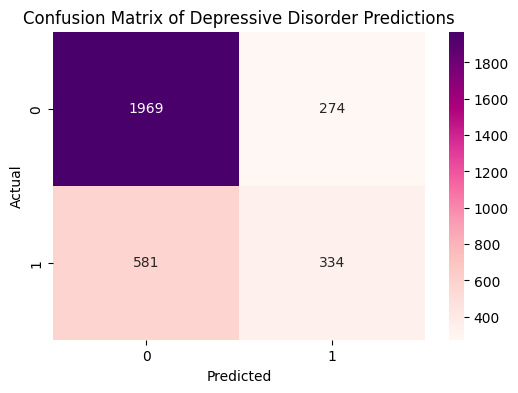

In [87]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='RdPu', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Depressive Disorder Predictions")
plt.show()


our model is accurately predicting alot of non-depressed people as non-depressed 


In [88]:
from sklearn.metrics import roc_curve, roc_auc_score

In [89]:
prob_test = pipe2.predict_proba(X_test)[:,1]
prob_test

array([0.75084356, 0.09090909, 0.        , ..., 0.18181818, 0.5       ,
       0.        ])

In [90]:
fpr, tpr, thresholds = roc_curve(y_test, prob_test)

In [91]:
import plotly.graph_objects as go

In [92]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr,y=tpr, mode="lines", name='ROC Curves'))
fig

In [93]:
roc_auc_score(y_test,prob_test)

0.7077925494982569

One of the objectives that we had for this project was classifying if an individual data point could be classified as having ever experienced a mental health disorder or not, based on adverse childhood experiences. To achieve this objective we built a K-Nearest Neighbor model. The target variable for this model was, 'ADDEPEV3'. ADDEPEV3 asked the respondent's if they had ever been told they had a depressive disorder. The KNN model had two classes it could predict, 1.0 meaning yes, and 0.0 meaning no. There were 17 predictor variables. Cross-Validated balance accuracy was used to determine that the optimal number of neighhbors to use was 5. Once the KNN model was ran with k=5, the model had an accuracy of **{acc:.3f}**  and a balanced accuracy of **{bal_acc:.3f}**. After further investigating our models predictions, we see that the bigest class was data points that have experienced depression being correctly classified as having had depression. 



In [94]:
from IPython.display import Markdown, display

my_var = 42
display(Markdown(f"### One of the objectives that we had for this project was classifying if an individual data point could be classified as having ever experienced a mental health disorder or not, based on adverse childhood experiences. To achieve this objective we built a K-Nearest Neighbor model. The target variable for this model was, 'ADDEPEV3'. ADDEPEV3 asked the respondent's if they had ever been told they had a depressive disorder. The KNN model had two classes it could predict, 1.0 meaning yes, and 0.0 meaning no. There were 17 predictor variables. Cross-Validated balance accuracy was used to determine that the optimal number of neighhbors to use was 5. Once the KNN model was ran with k=5, the model had an accuracy of **{acc:.3f}**  and a balanced accuracy of **{bal_acc:.3f}**. After further investigating our models predictions, we see that the bigest class was data points that have experienced depression being correctly classified as having had depression."))


### One of the objectives that we had for this project was classifying if an individual data point could be classified as having ever experienced a mental health disorder or not, based on adverse childhood experiences. To achieve this objective we built a K-Nearest Neighbor model. The target variable for this model was, 'ADDEPEV3'. ADDEPEV3 asked the respondent's if they had ever been told they had a depressive disorder. The KNN model had two classes it could predict, 1.0 meaning yes, and 0.0 meaning no. There were 17 predictor variables. Cross-Validated balance accuracy was used to determine that the optimal number of neighhbors to use was 5. Once the KNN model was ran with k=5, the model had an accuracy of **0.729**  and a balanced accuracy of **0.621**. After further investigating our models predictions, we see that the bigest class was data points that have experienced depression being correctly classified as having had depression.